In [1]:
from pose_utils import *
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [2]:
inferencer = prepare_inference()

Loads checkpoint by local backend from path: D:\AxxessHack\pose-core\alexnet_coco_256x192-a7b1fd15_20200727.pth
02/17 22:32:22 - mmengine - WARNING - dataset_meta are not saved in the checkpoint's meta data, load via config.
02/17 22:32:22 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.


d:\AxxessHack\.venv\lib\site-packages\mmpose\datasets\datasets\utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "d:\AxxessHack\.venv\lib\site-packages\mmpose\.mim\configs\_base_\datasets\coco.py" will be used instead.
  warnings.warn(


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
02/17 22:32:24 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


In [3]:
output = get_frame_hands_and_feet_coordinates(inferencer, r'D:\AxxessHack\pose-core\demo3.png')

d:\AxxessHack\.venv\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
print(output)

{'left_hand': [231.13955688476562, 363.8266296386719], 'right_hand': [52.36676025390625, 356.4240417480469], 'right_foot': [114.5486068725586, 652.528076171875], 'left_foot': [161.18499755859375, 652.528076171875]}


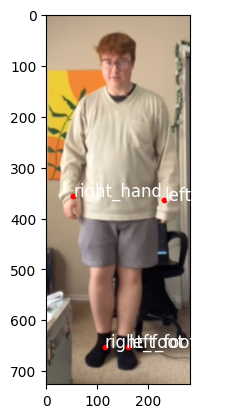

In [7]:
# plot the image with the coordinates
img = plt.imread(r'D:\AxxessHack\pose-core\demo3.png')

for key in output:
	pose_coordinate = output[key]
	plt.scatter(pose_coordinate.x, pose_coordinate.y, s=10, c='red', marker='o')	
	# add the text of the key
	plt.text(pose_coordinate.x, pose_coordinate.y, key, fontsize=12, color='white')
	
	# sleep
	time.sleep(0.1)
	
	plt.imshow(img)

In [8]:
# now get all of the video coordinates
video_output = get_video_hands_and_feet_coordinates(inferencer, r'D:\AxxessHack\pose-core\cut_video_eric_jump2.mp4')

# now show all the frames
for frame in video_output:
	# plot the image with the coordinates
	img = plt.imread(r'D:\AxxessHack\pose-core\demo3.png')

	for key in frame:
		pose_coordinate = frame['coordinates'][key]
		plt.scatter(pose_coordinate.x, pose_coordinate.y, s=10, c='red', marker='o')	
		# add the text of the key
		plt.text(pose_coordinate.x, pose_coordinate.y, key, fontsize=12, color='white')
		
	plt.imshow(img)
	plt.show() 

KeyError: 'coordinates'

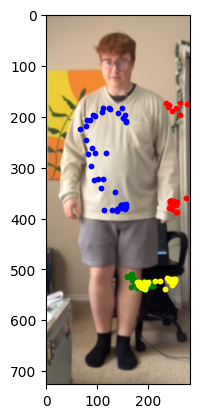

In [ ]:
# now get all of the grouped coordinates
left_hands = []
for frame in video_output:
	pose_coordinate = frame['left_hand']
	left_hands.append([pose_coordinate.x, pose_coordinate.y])
left_hands = np.array(left_hands)

right_hands = []
for frame in video_output:
	pose_coordinate = frame['right_hand']
	right_hands.append([pose_coordinate.x, pose_coordinate.y])
right_hands = np.array(right_hands)

left_feet = []
for frame in video_output:
	pose_coordinate = frame['left_foot']
	left_feet.append([pose_coordinate.x, pose_coordinate.y])
left_feet = np.array(left_feet)

right_feet = []
for frame in video_output:
	pose_coordinate = frame['right_foot']
	right_feet.append([pose_coordinate.x, pose_coordinate.y])
right_feet = np.array(right_feet)

img = plt.imread(r'D:\AxxessHack\pose-core\demo3.png')

plt.scatter(left_hands[:,0], left_hands[:,1], s=10, c='red', marker='o')
plt.scatter(right_hands[:,0], right_hands[:,1], s=10, c='blue', marker='o')
plt.scatter(left_feet[:,0], left_feet[:,1], s=10, c='green', marker='o')
plt.scatter(right_feet[:,0], right_feet[:,1], s=10, c='yellow', marker='o')
plt.imshow(img)
